<a href="https://colab.research.google.com/github/NismaK/Employee_Burnout_Analysis_by_Nisma/blob/main/Employee_burnout_analysis_by_Nisma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [4]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [5]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [6]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [7]:
data.shape

(22750, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [10]:
data['Employee ID'].unique()

array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe31003300320037003900', ..., 'fffe390032003000',
       'fffe33003300320036003900', 'fffe3400350031003800'], dtype=object)

In [11]:
data["Date of Joining"].unique()

<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00:00:00',
 '2008-02-01 00:00:00']
Length: 366, dtype: datetime64[ns]

In [12]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [14]:
data["Designation"].unique()

array([2, 1, 3, 0, 4, 5])

In [15]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [16]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
22745,False
22746,False
22747,False
22748,False


In [17]:
data = data.drop('Employee ID', axis = 1)

In [18]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify 'ns' as the unit when converting to datetime64
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
2,69
3,307
4,205
...,...
22745,364
22746,18
22747,309
22748,9


In [19]:
data.isnull().sum().sum()

np.int64(4622)

In [20]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [21]:
print(X)

[[Timestamp('2008-09-30 00:00:00') 'Female' 'Service' ... 3.0 3.8 0.16]
 [Timestamp('2008-11-30 00:00:00') 'Male' 'Service' ... 2.0 5.0 0.36]
 [Timestamp('2008-03-10 00:00:00') 'Female' 'Product' ... nan 5.8 0.49]
 ...
 [Timestamp('2008-11-05 00:00:00') 'Male' 'Service' ... 7.0 nan 0.72]
 [Timestamp('2008-01-10 00:00:00') 'Female' 'Service' ... 5.0 5.9 0.52]
 [Timestamp('2008-01-06 00:00:00') 'Male' 'Product' ... 6.0 7.8 0.61]]


In [22]:
print(y)

[273 334  69 ... 309   9   5]


In [23]:
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


In [24]:
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [25]:
#checking dataset for null values after handling null values
data.isnull().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0
Days,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       22750 non-null  datetime64[ns]
 1   Gender                22750 non-null  object        
 2   Company Type          22750 non-null  object        
 3   WFH Setup Available   22750 non-null  object        
 4   Designation           22750 non-null  int64         
 5   Resource Allocation   22750 non-null  float64       
 6   Mental Fatigue Score  22750 non-null  float64       
 7   Burn Rate             22750 non-null  float64       
 8   Days                  22750 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [27]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,273
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,334
2,2008-03-10,Female,Product,Yes,2,4.481398,5.8,0.49,69
3,2008-11-03,Male,Service,Yes,1,1.000000,2.6,0.20,307
4,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,205


In [28]:
data.dtypes

,0
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64
Days,int64


In [29]:
List = ['Designation','Resource Allocation','Mental Fatigue Score']
# Box Plot for Outlier Detection

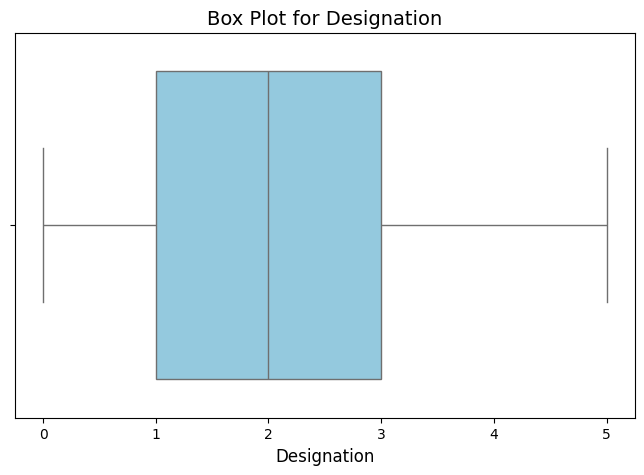

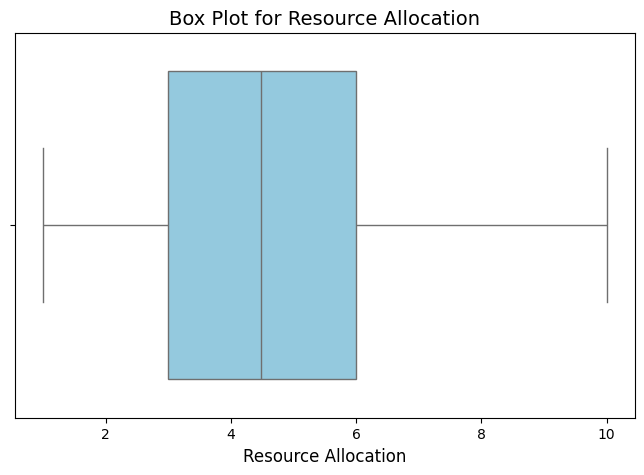

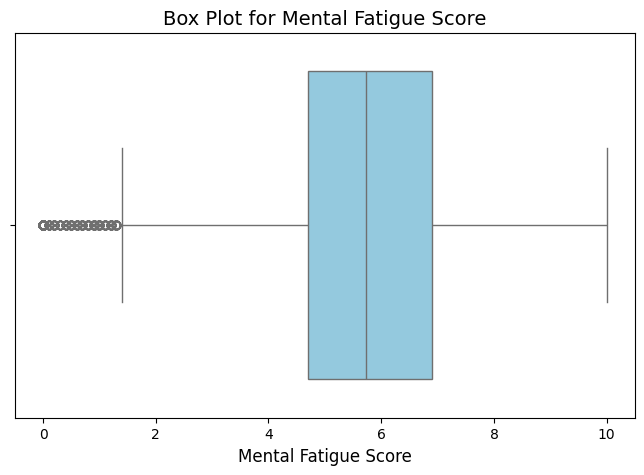

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
for numerical_column in List:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=data[numerical_column], color='skyblue')
  plt.title(f'Box Plot for {numerical_column}', fontsize=14)
  plt.xlabel(numerical_column, fontsize=12)
  plt.show()

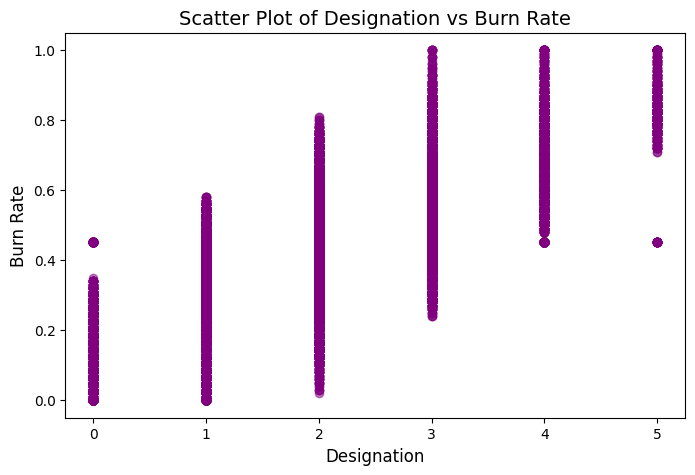

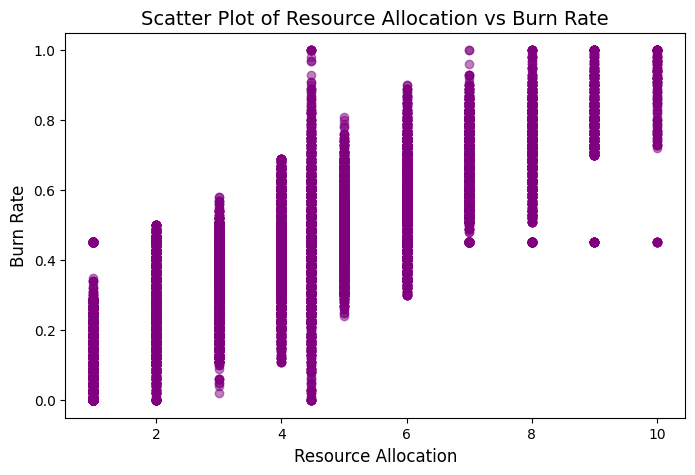

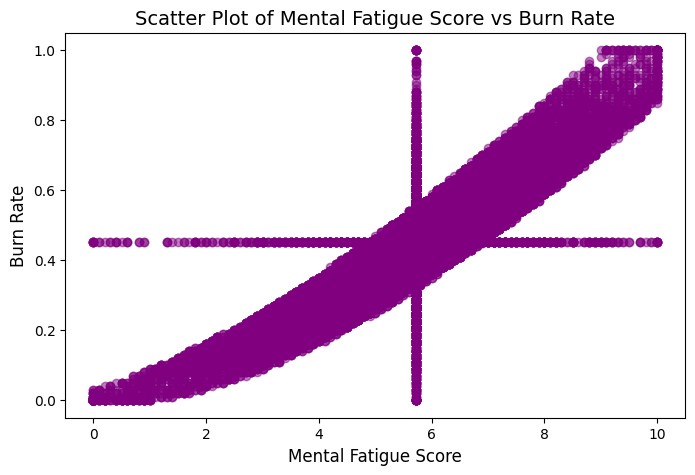

In [31]:
# Scatter Plot for Outlier Detection (Assuming a target variable is present)
# Replace 'target_variable' with your actual target column name if applicable
for numerical_column in List:
  if 'Burn Rate' in data.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[numerical_column], data['Burn Rate'], alpha=0.5, color='purple')
    plt.title(f'Scatter Plot of {numerical_column} vs Burn Rate', fontsize=14)
    plt.xlabel(numerical_column, fontsize=12)
    plt.ylabel('Burn Rate', fontsize=12)
    plt.show()
  else:
    print("No target variable found; skipping scatter plot.")

In [32]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

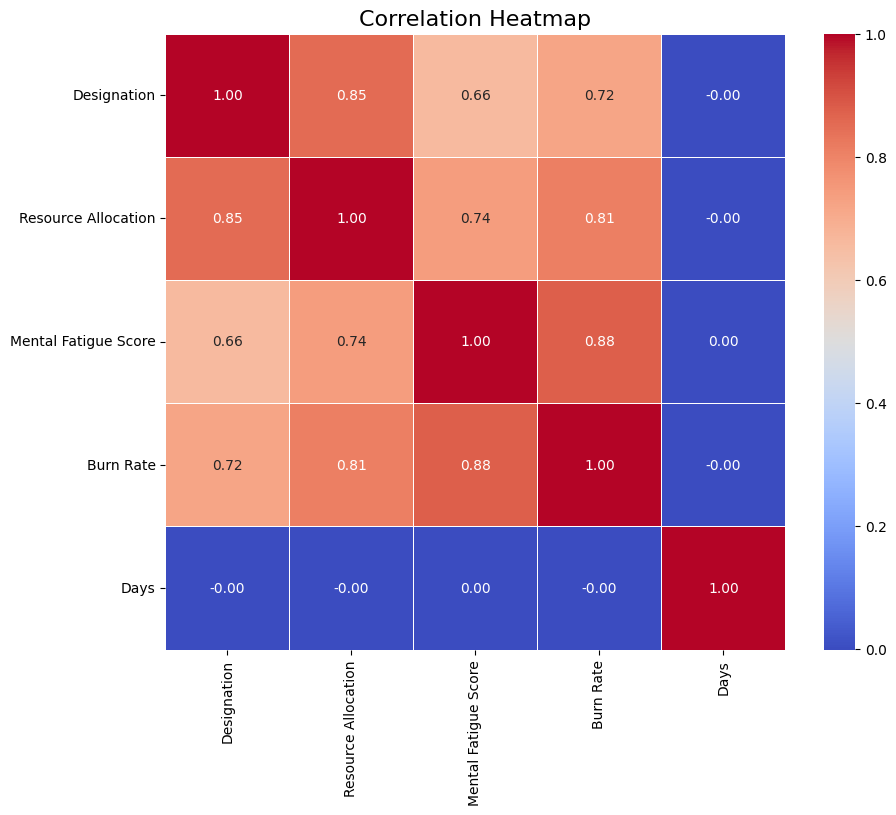

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [34]:
category_column1 = 'Gender'
category_column2 = 'WFH Setup Available'


In [35]:
# Perform cross-tabulation
cross_tab = pd.crosstab(data[category_column1], data[category_column2])

Cross-Tabulation:
 WFH Setup Available    No   Yes
Gender                         
Female               5060  6848
Male                 5400  5442


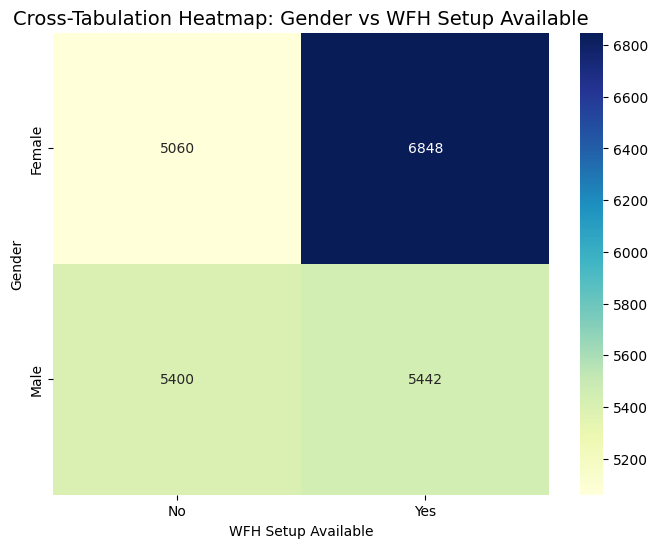

In [36]:
print("Cross-Tabulation:\n", cross_tab)

# Heatmap for cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Cross-Tabulation Heatmap: {category_column1} vs {category_column2}', fontsize=14)
plt.xlabel(category_column2)
plt.ylabel(category_column1)
plt.show()

In [37]:
group_column = 'Gender'
numerical_column = 'Burn Rate'

# Group-wise summary (mean)
group_summary = data.groupby(group_column)[numerical_column].mean()

# Display the group-wise summary
print("Group-Wise Summary (Mean):\n", group_summary)

Group-Wise Summary (Mean):
 Gender
Female    0.424159
Male      0.482589
Name: Burn Rate, dtype: float64



Pivot Table:
 WFH Setup Available        No       Yes
Gender                                 
Female               0.483935  0.379991
Male                 0.543254  0.422393


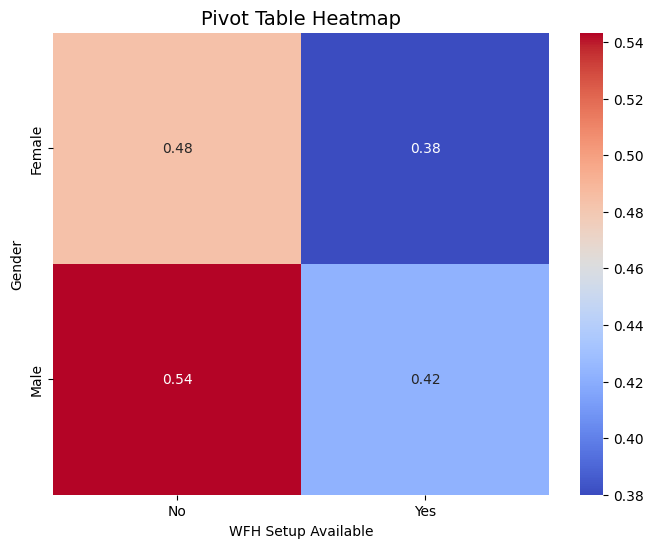

In [38]:
import seaborn as sns
pivot_table = pd.pivot_table(data, values=numerical_column, index=group_column, columns='WFH Setup Available', aggfunc='mean')
print("\nPivot Table:\n", pivot_table)

if pivot_table.shape[1] > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Pivot Table Heatmap', fontsize=14)
    plt.show()

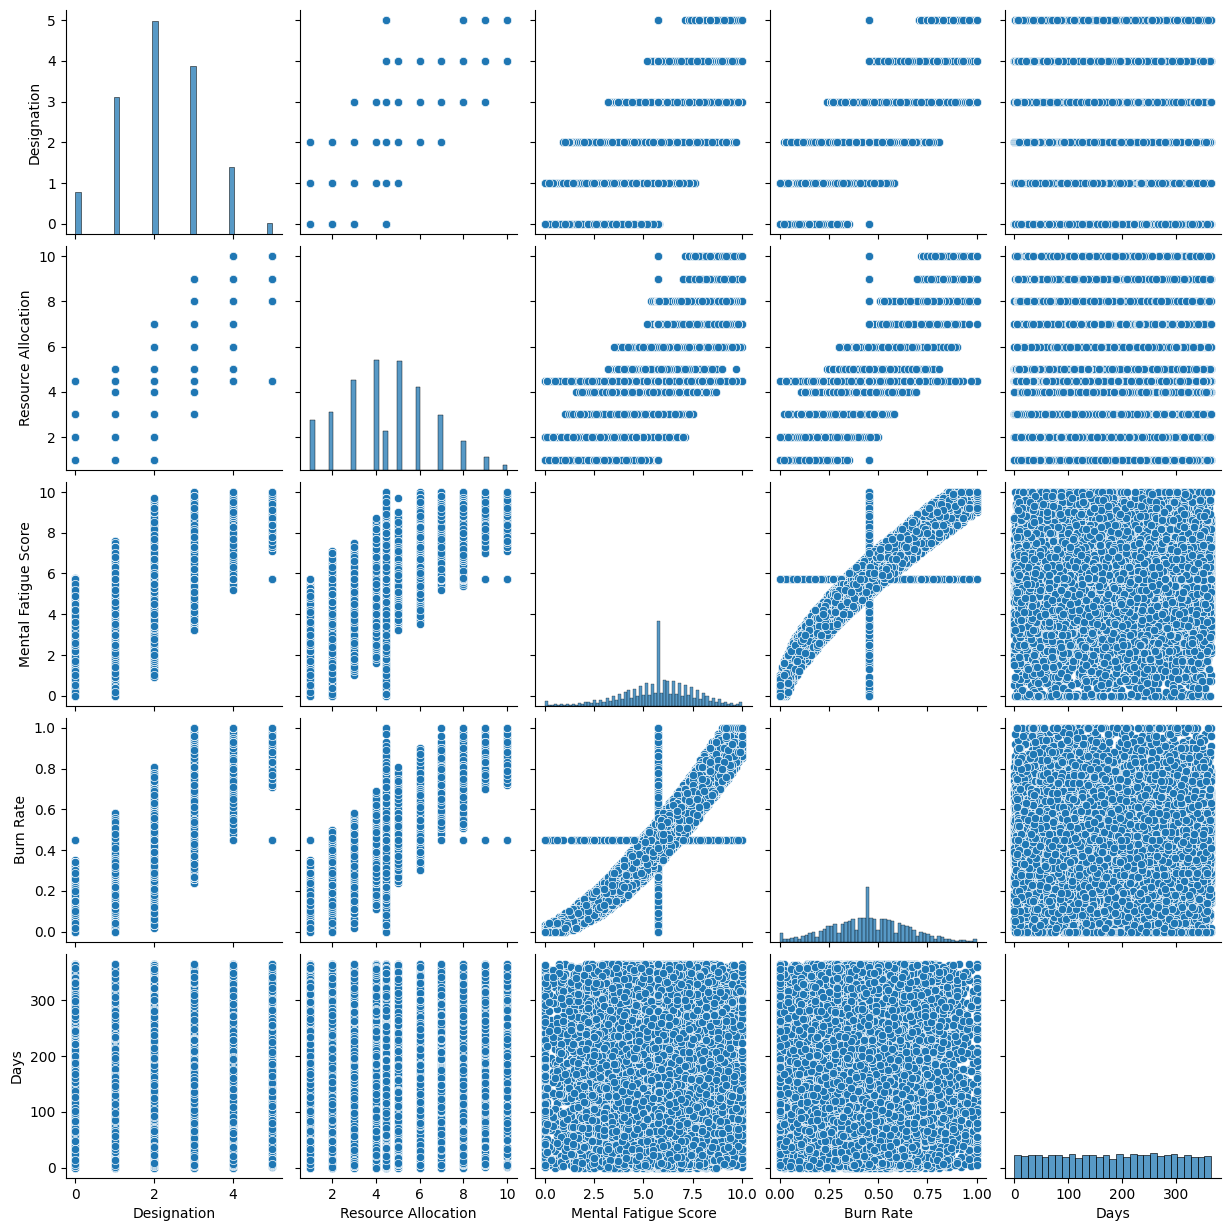

In [39]:
sns.pairplot(data)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Convert X_train and X_test to Pandas DataFrames
X_train = pd.DataFrame(X_train, columns=data.columns[:-1])  # Use original column names
X_test = pd.DataFrame(X_test, columns=data.columns[:-1])  # Use original column names

# Handle Timestamp columns (e.g., 'Date of Joining')
date_joining_col = 'Date of Joining'  # Identify the column by name
for df in [X_train, X_test]:
    # Check if the column exists and contains Timestamp objects or datetime64
    if date_joining_col in df.columns and (pd.api.types.is_datetime64_any_dtype(df[date_joining_col]) or df[date_joining_col].dtype == object):
        # Convert to Unix timestamp (seconds)
        df[date_joining_col] = pd.to_datetime(df[date_joining_col]).astype("datetime64[ns]").astype(int) / 10**9

# ---- Handle categorical features using one-hot encoding ----
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']  # List your categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Create OneHotEncoder instance

# Fit and transform on training data
encoded_train = encoder.fit_transform(X_train[categorical_cols])
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols))

# Transform on testing data
encoded_test = encoder.transform(X_test[categorical_cols])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add encoded columns
X_train = X_train.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, encoded_train_df], axis=1)

X_test = X_test.drop(categorical_cols, axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)
# --------------------------------------------------------

# Proceed with model fitting
X_train = X_train.astype(float, errors='ignore')  # Ignore errors during conversion
X_test = X_test.astype(float, errors='ignore')  # Ignore errors during conversion

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace with your desired strategy

# Fit and transform on training data
X_train = imputer.fit_transform(X_train)

# Transform testing data
X_test = imputer.transform(X_test)

from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [52]:
model_params = {
    'coefficients': linear_regression_model.coef_.tolist(),
    'intercept': linear_regression_model.intercept_.tolist() if isinstance(linear_regression_model.intercept_, np.ndarray) else linear_regression_model.intercept_
}

In [42]:
y_pred = linear_regression_model.predict(X_test)

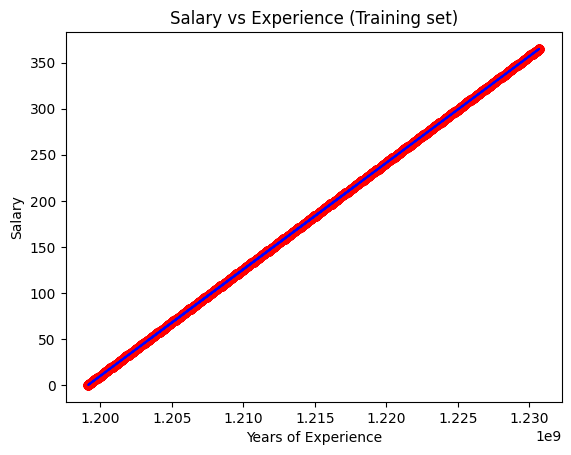

In [43]:
# Reshape X_train to 1D for plotting
X_train_1d = X_train[:, 0]  # Select the first feature (column) for plotting

# Scatter plot
plt.scatter(X_train_1d, y_train, color='red')
plt.plot(X_train_1d, linear_regression_model.predict(X_train), color='blue')  # Adjust prediction input
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')  # Update x-axis label if necessary
plt.ylabel('Salary')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 3.308722450212111e-24
Root Mean Squared Error: 1.8189894035458565e-12
Mean Absolute Error: 1.8189894035458565e-12
R-squared Score: 1.0


In [45]:
feature_names = data.columns[:-1].tolist()  # Get column names from original DataFrame 'data' (excluding the last column, which is the target)
print(feature_names)

['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']


In [46]:
'''import pickle
with open('EBA_LR.pkl', 'wb') as file:
    pickle.dump(linear_regression_model, file)'''


In [47]:
'''from google.colab import files
files.download('EBA_LR.pkl')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
'''from sklearn.linear_model import LinearRegression
import joblib

# Example model
linear_regression_model = LinearRegression()

# Save using joblib
joblib.dump(linear_regression_model, 'EBA_LR.joblib')

# Download
from google.colab import files
files.download('EBA_LR.joblib')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
with open('model_params.json', 'w') as f:
    json.dump(model_params, f)

from google.colab import files
files.download('model_params.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>